<a href="https://colab.research.google.com/github/schen8180/sophiac.github.io/blob/gh-pages/Sophia_Chen_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import (including the correct names of the variables) the data from the QSAR Fish Toxicity research: https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity 


On this webpage you will find a description of the explanatory variables and the dependent variable. 

Implement 10-fold cross validations and the correct data preprocessing, make polynomial models of degree 1, 2 and 3 and determine which degree achieves the best external validation.  

For this, you will use the regularized regression models such as Ridge, Lasso and ElasticNet and you will also determine the best value of the hyperparameter alpha in each case. In the case of ElasticNet, the second hyperparameter, L1 ratio, can be assumed to be 0.5. 

After you obtained the best choice of polynomial degree and hyperparameter alpha compute the residuals of the best model on the whole data and determine whether they follow a normal distribution.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR #support vector regression
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error as MSE
#we conceptualize this part of the project where you think about what you need 

In [ ]:
data = pd.read_csv("drive/MyDrive/Examples 310/qsar_fish_toxicity.csv", sep = ';', names = ['CIC0','SM1_Dz(Z)','GATS1i', 'NdsCH','NdssC','MLOGP','LC50 [-LOG(mol/L)]'])

In [ ]:
data

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [ ]:
X = data.iloc[:,:-1] #all col except last col - independent variable
y = data.iloc[:,-1] #last col - dependent variable

In [ ]:
#testing the lasso,ridge, and elasticnet models
def model_testing(X,y,model,k,d,rs): 
   kf = KFold(n_splits = k, shuffle=True, random_state = rs)
   R2train = []
   R2test = []
   MSEtrain = []
   MSEtest = []

   scale = StandardScaler()
   poly = PolynomialFeatures(degree=d)

   pipe = Pipeline([['Scaling',scale],['Polynomial Features',poly]]) #first provide a name for that function

   for idxtrain,idxtest in kf.split(X):
     Xtrain = X[idxtrain]
     Xtest = X[idxtest]
     ytrain = y[idxtrain]
     ytest = y[idxtest]


     Xpoly_train = pipe.fit_transform(Xtrain)
     Xpoly_test = pipe.transform(Xtest)

     model.fit(Xpoly_train,ytrain)
     R2train.append(model.score(Xpoly_train,ytrain))
     R2test.append(model.score(Xpoly_test,ytest))
     MSEtrain.append(MSE(ytrain,model.predict(Xpoly_train)))
     MSEtest.append(MSE(ytest,model.predict(Xpoly_test)))
   return np.mean(R2train),np.mean(R2test), np.mean(MSEtrain), np.mean(MSEtest)

In [ ]:
x = X

### codes for lasso, ridge, elasticnet

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso,ElasticNet, LinearRegression as LR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as MSE


In [ ]:
X
y

0      3.770
1      3.115
2      3.531
3      3.510
4      5.390
       ...  
903    3.109
904    4.040
905    4.818
906    5.317
907    8.201
Name: LC50 [-LOG(mol/L)], Length: 908, dtype: float64

In [ ]:
def DoKFold(model,X,y,k,d,random_state=123):
    
    scale = SS()
    k = 10
    kf = KFold(n_splits=k, shuffle = True, random_state=random_state)
    
    train = []
    test = []

    if type(X) == pd.core.frame.DataFrame:
        X = X.values
    
    for idxTrain,idxTest in kf.split(X):
        Xtrain = X[idxTrain,:]
        Xtest = X[idxTest,:]
        ytrain = y[idxTrain]
        ytest = y[idxTest]

        pipe = pipeline(d)
        Xtrain = pipe.fit_transform(Xtrain)
        Xtest = pipe.transform(Xtest)
        model.fit(Xtrain,ytrain)
        
        train.append(model.score(Xtrain,ytrain))
        test.append(model.score(Xtest,ytest))
        
    return np.mean(train), np.mean(test)

In [ ]:
def alpha_range(model,start,stop,num_points,deg,k):
  a_range = np.linspace(start,stop,num_points)
  mean_training = []
  mean_testing = []

  for a in a_range:
      m = model(alpha=a,fit_intercept=False)
      tr,te = DoKFold(m,X,y,k,deg,random_state=123)
      mean_training.append(np.mean(tr))
      mean_testing.append(np.mean(te))

  plt.figure(figsize=(8,4))
  plt.plot(a_range, mean_training, '-xk', label='Training')
  plt.plot(a_range, mean_testing, '-xr', label='Testing')
  plt.xlabel('$\\alpha$')
  plt.ylabel('Avg. $R^2$')
  plt.legend()
  plt.show()

  idx_max = np.argmax(mean_testing)
  print(mean_training[idx_max], mean_testing[idx_max], a_range[idx_max])

In [ ]:
def pipeline(d):
  scale = StandardScaler()
  poly = PolynomialFeatures(degree = d)
  pipe = Pipeline([['Scaling',scale],['Polynomial Features',poly]]) 
  return pipe

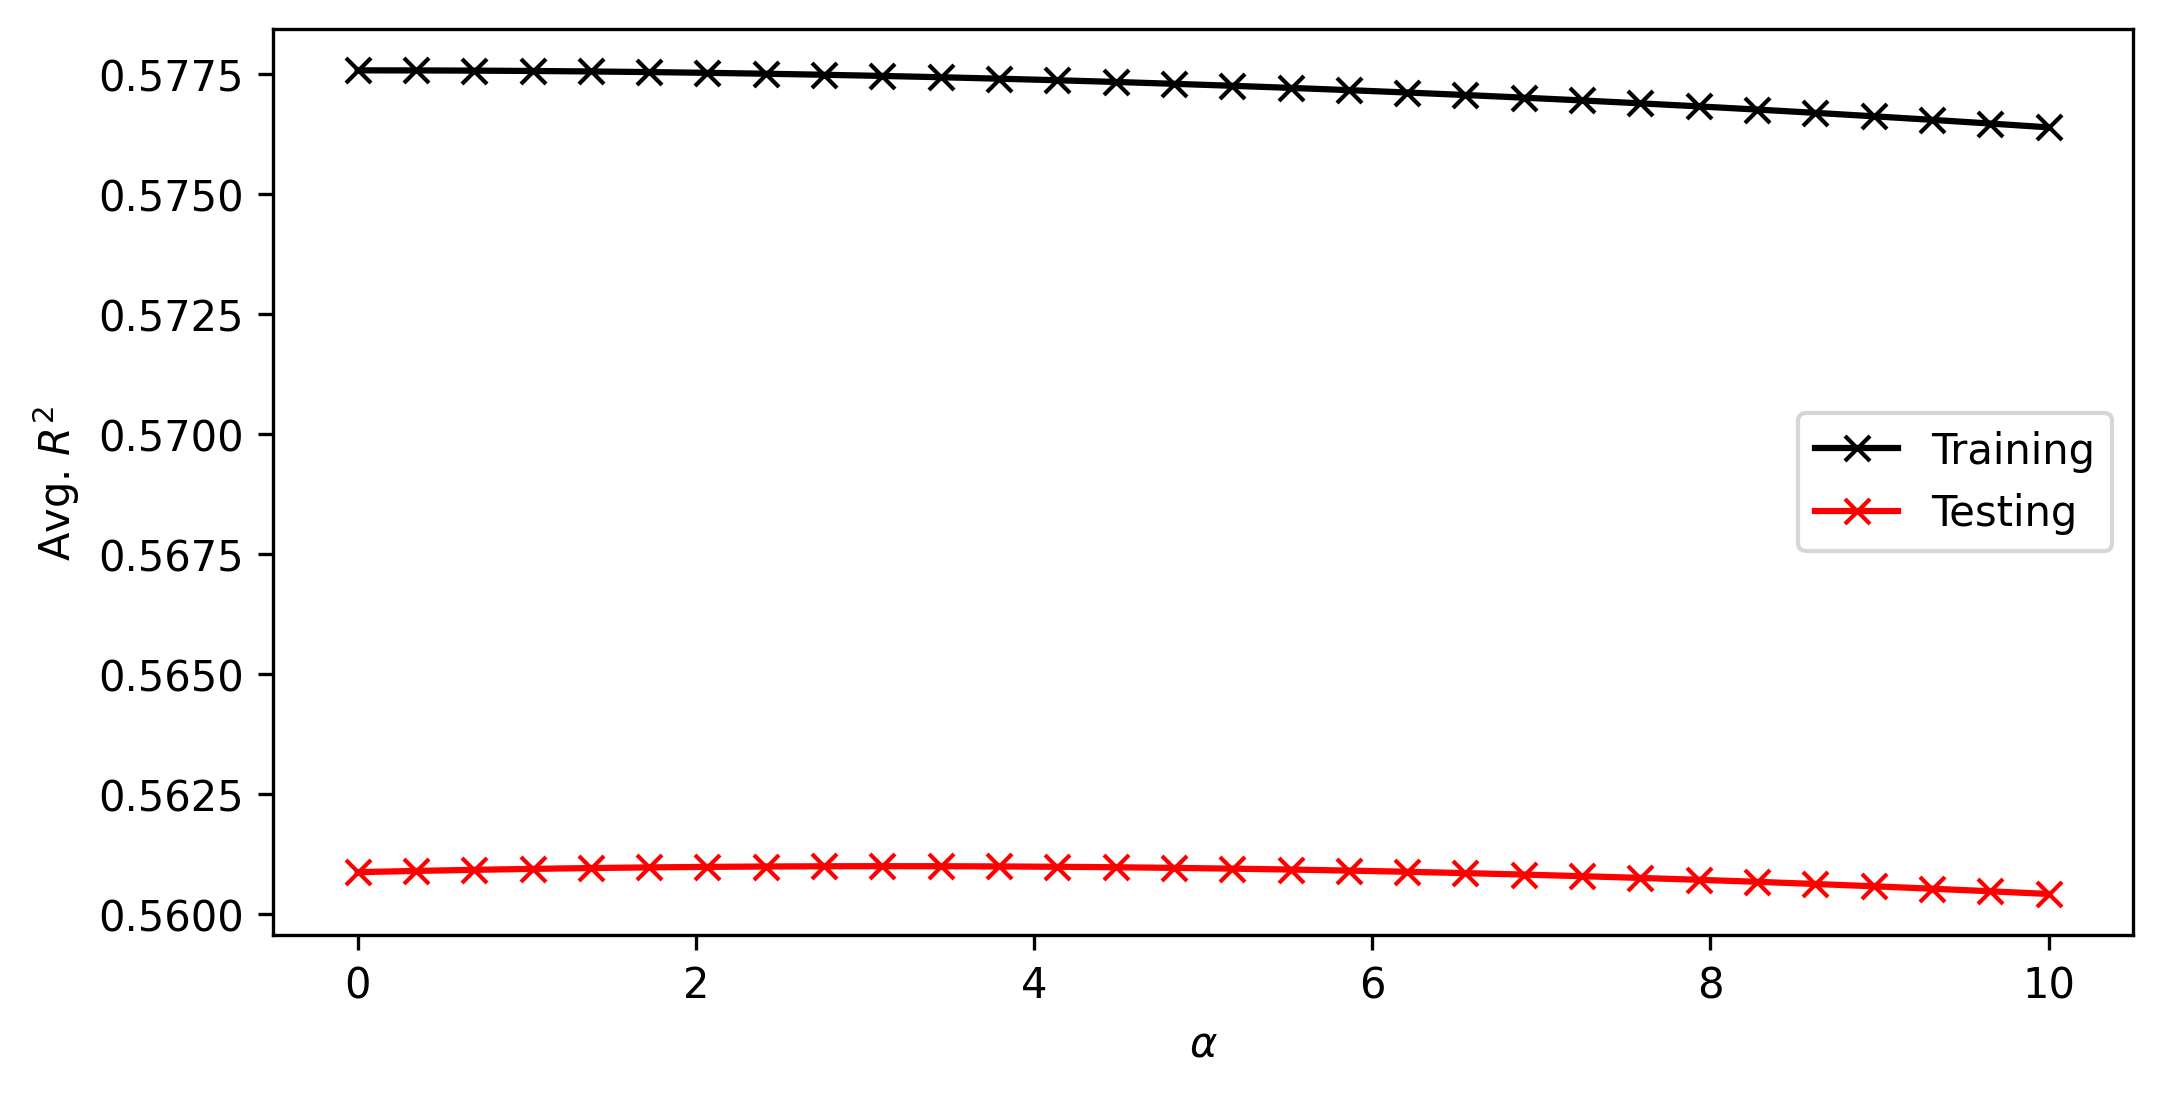

0.577461158855411 0.5609910797844532 3.1034482758620694


In [ ]:
#Ridge, degree 1
alpha_range(Ridge,0,10,30,1,10)

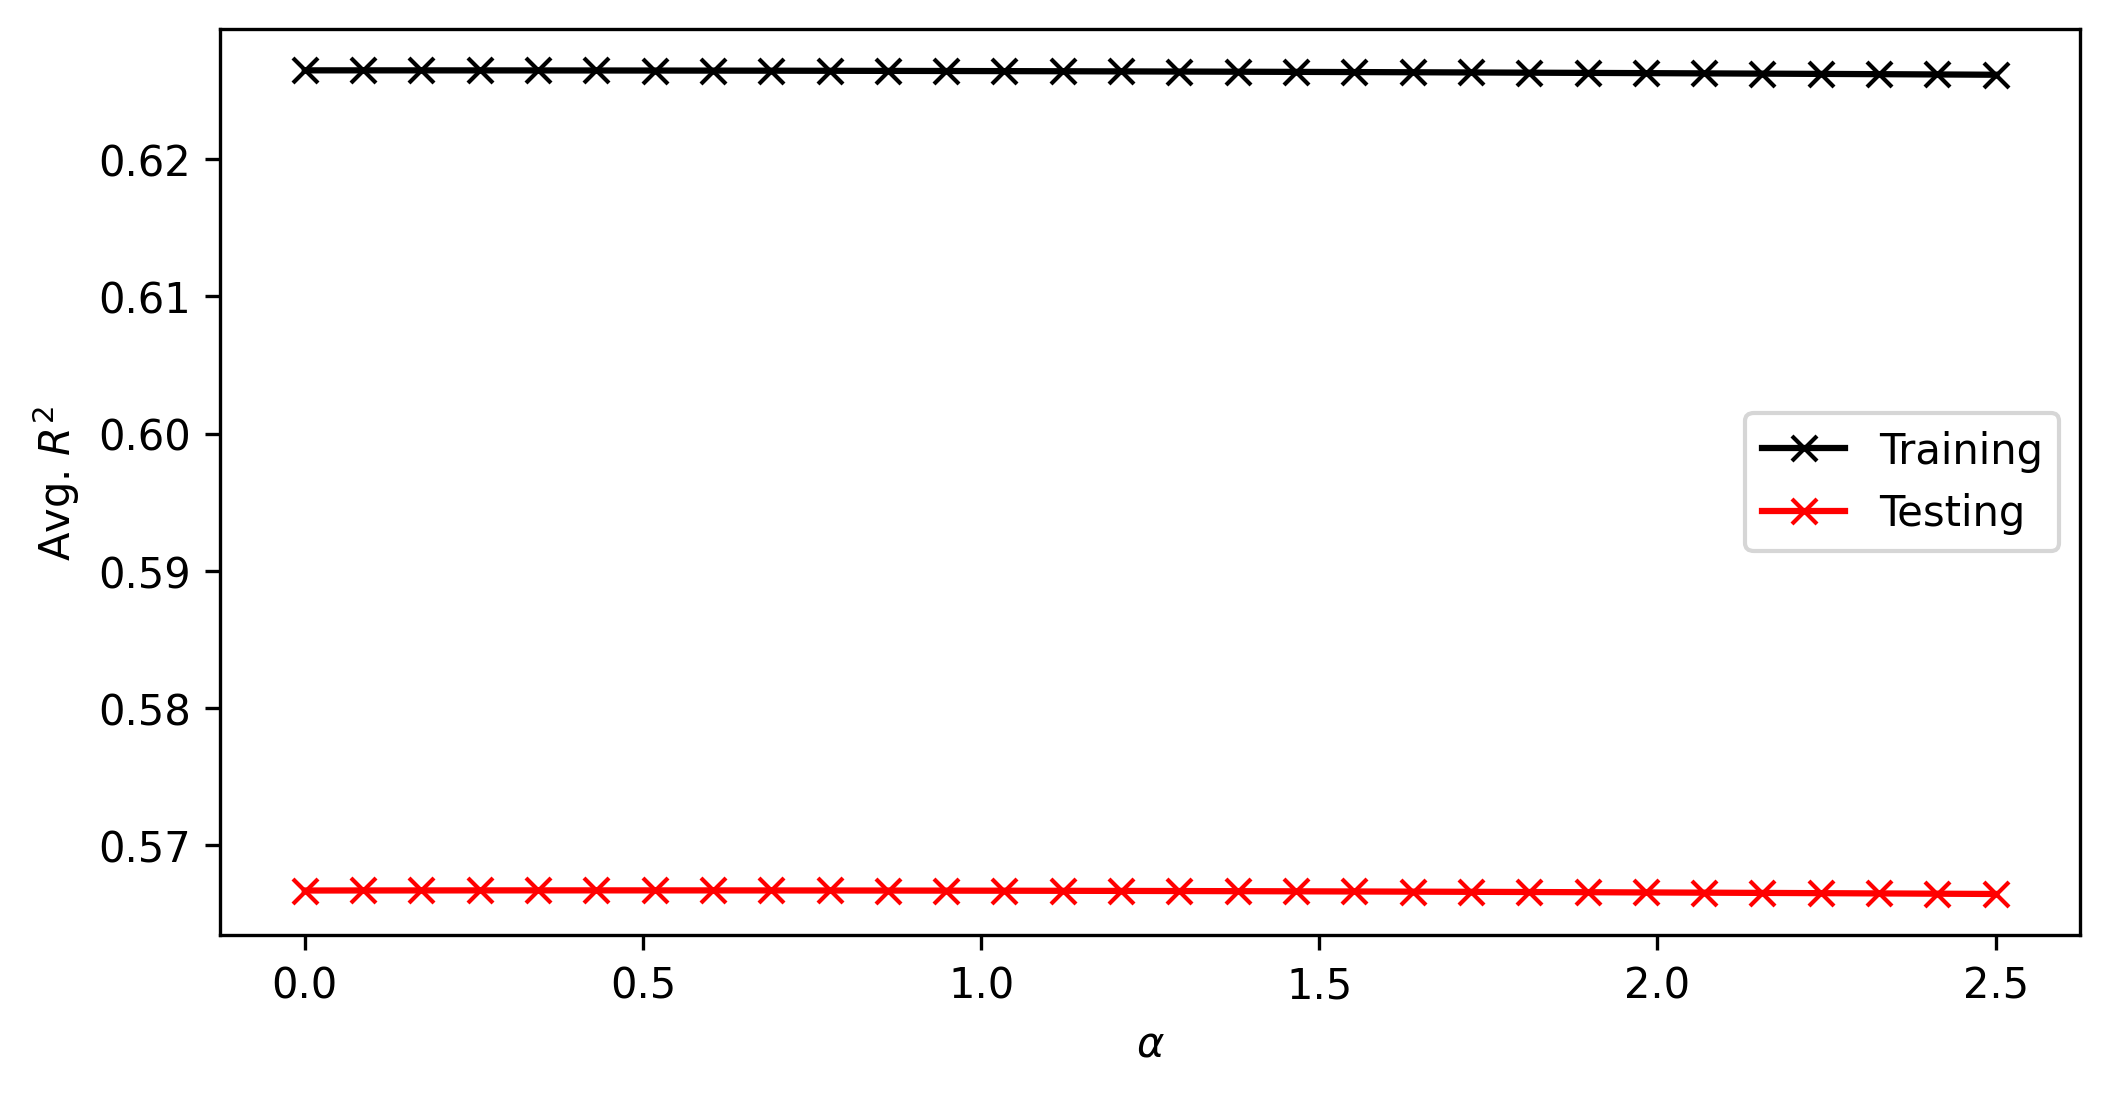

0.6264744767859254 0.5666973730760041 0.4310344827586207


In [ ]:
#Ridge, degree 2
alpha_range(Ridge,0,2.5,30,2,10)

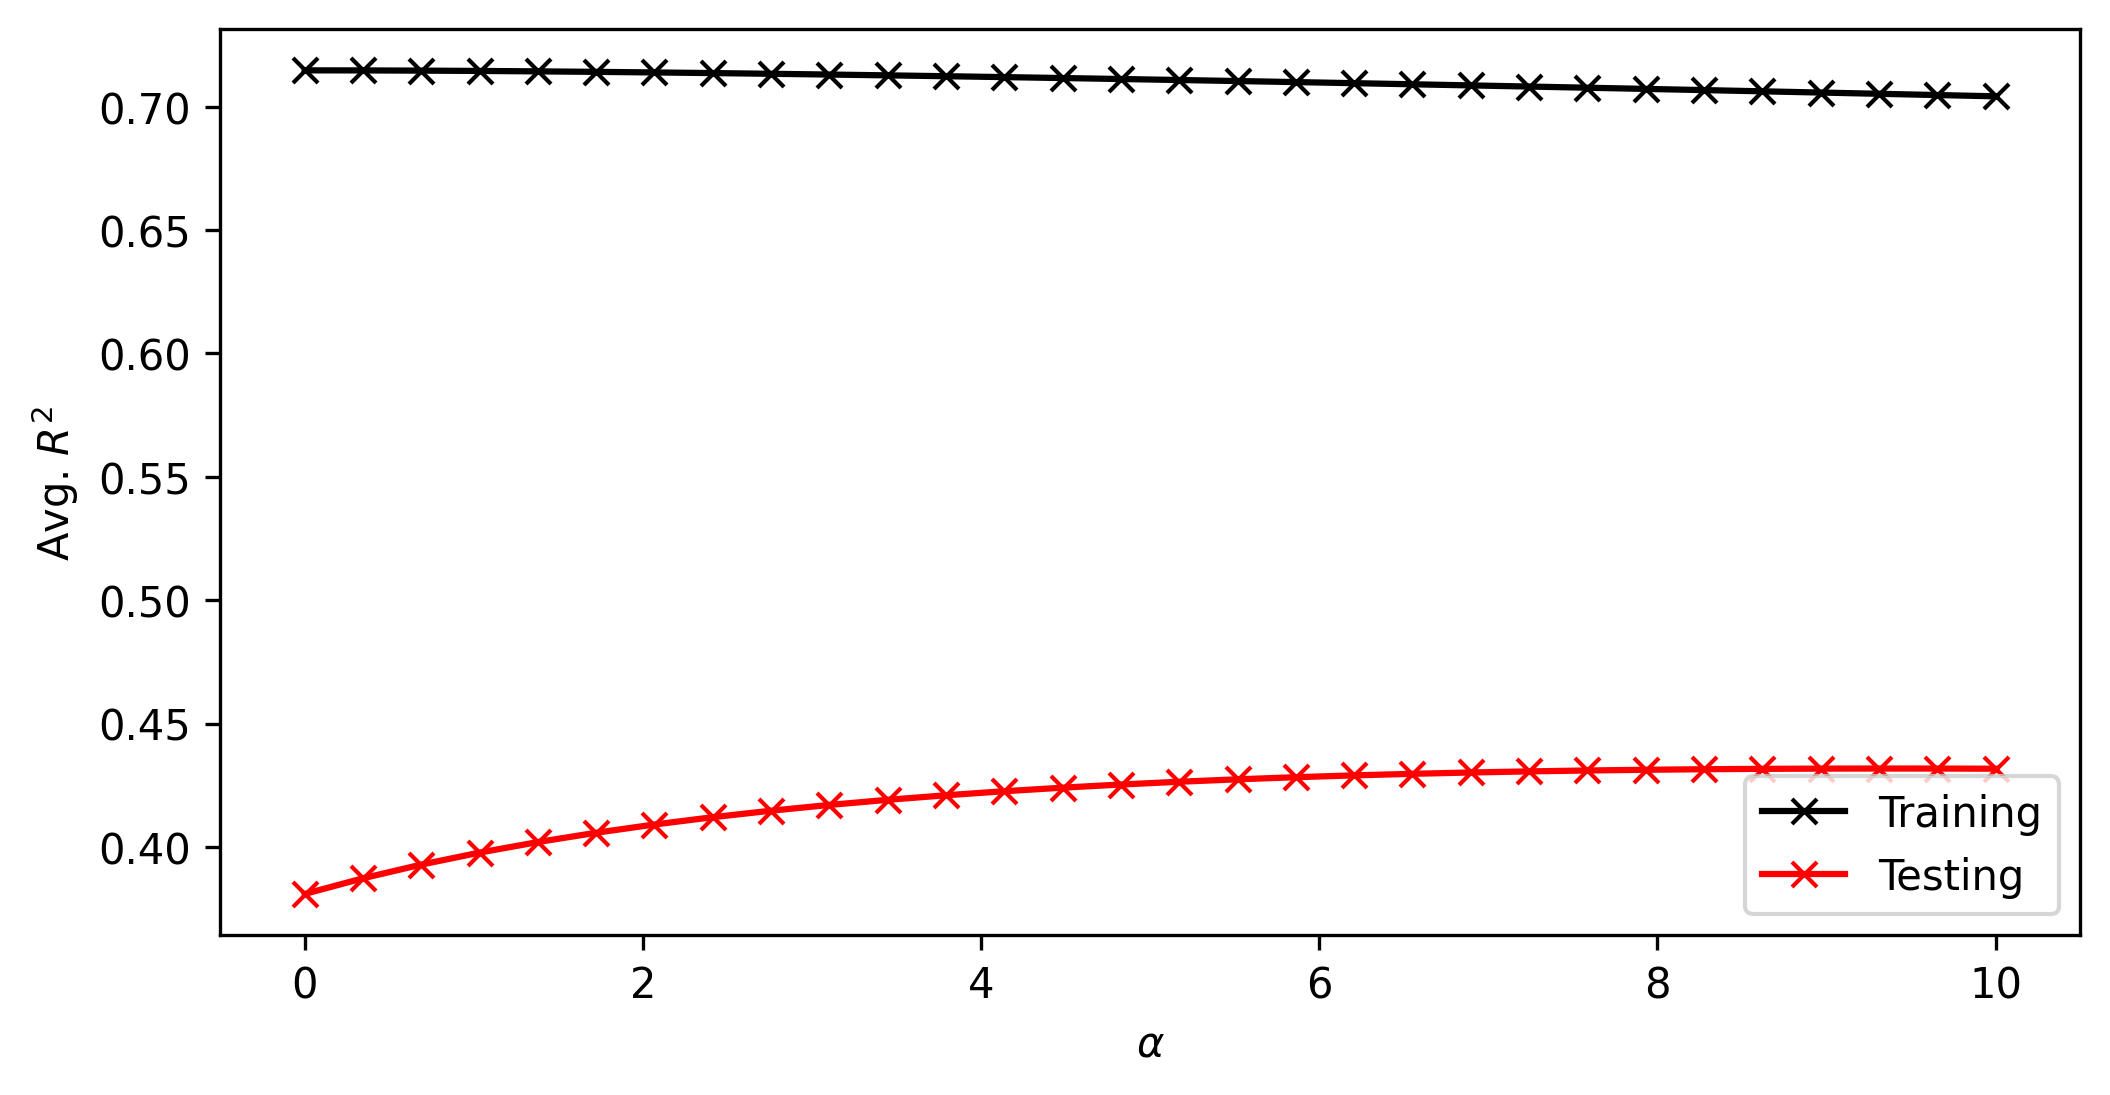

0.7052489485579334 0.43178984554856026 9.310344827586208


In [ ]:
#Ridge, degree 3
alpha_range(Ridge,0,10,30,3,10)

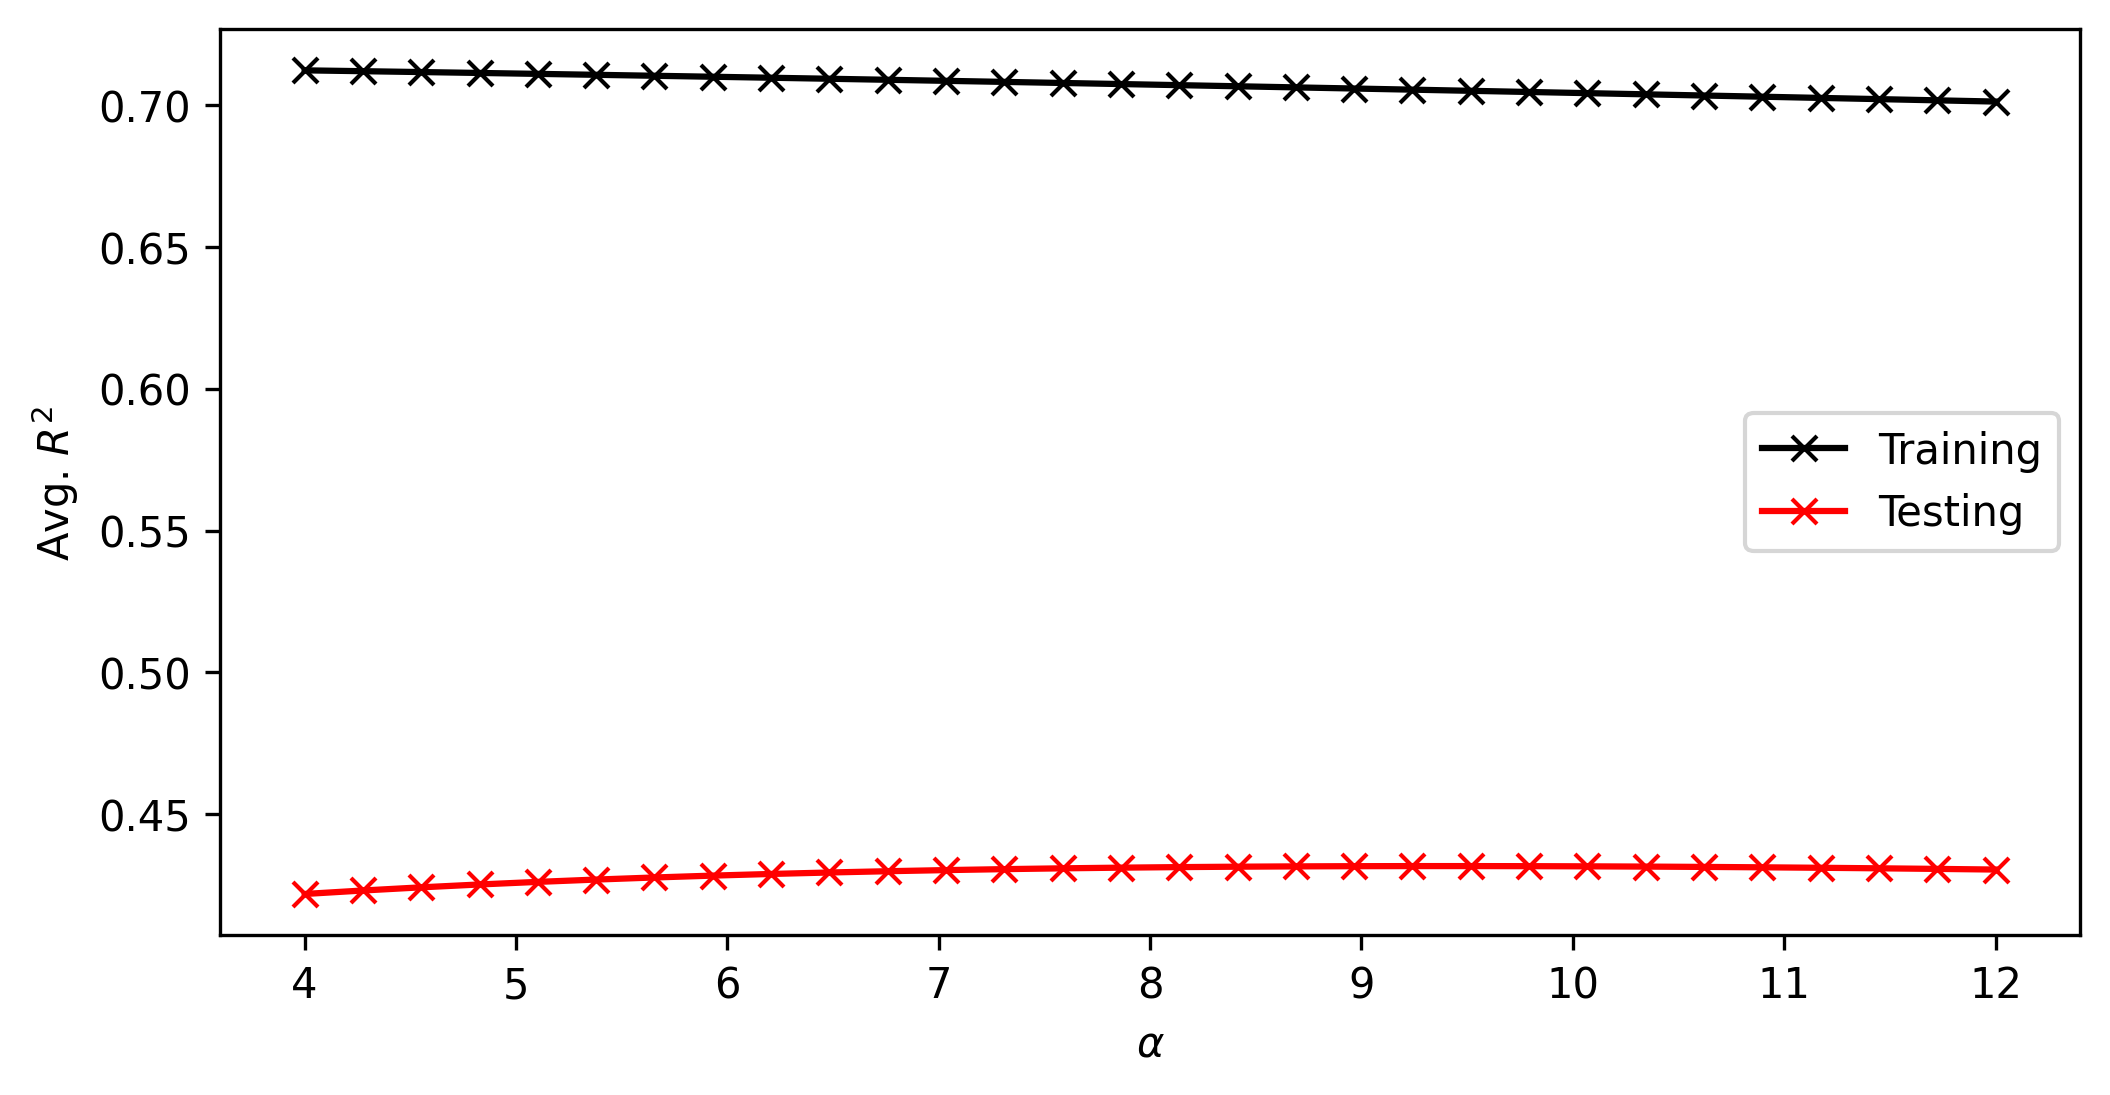

0.7049440117300133 0.4317877605201924 9.517241379310345


In [ ]:
#Lasso, degree 1
alpha_range(Lasso,4,12,30,1,10)

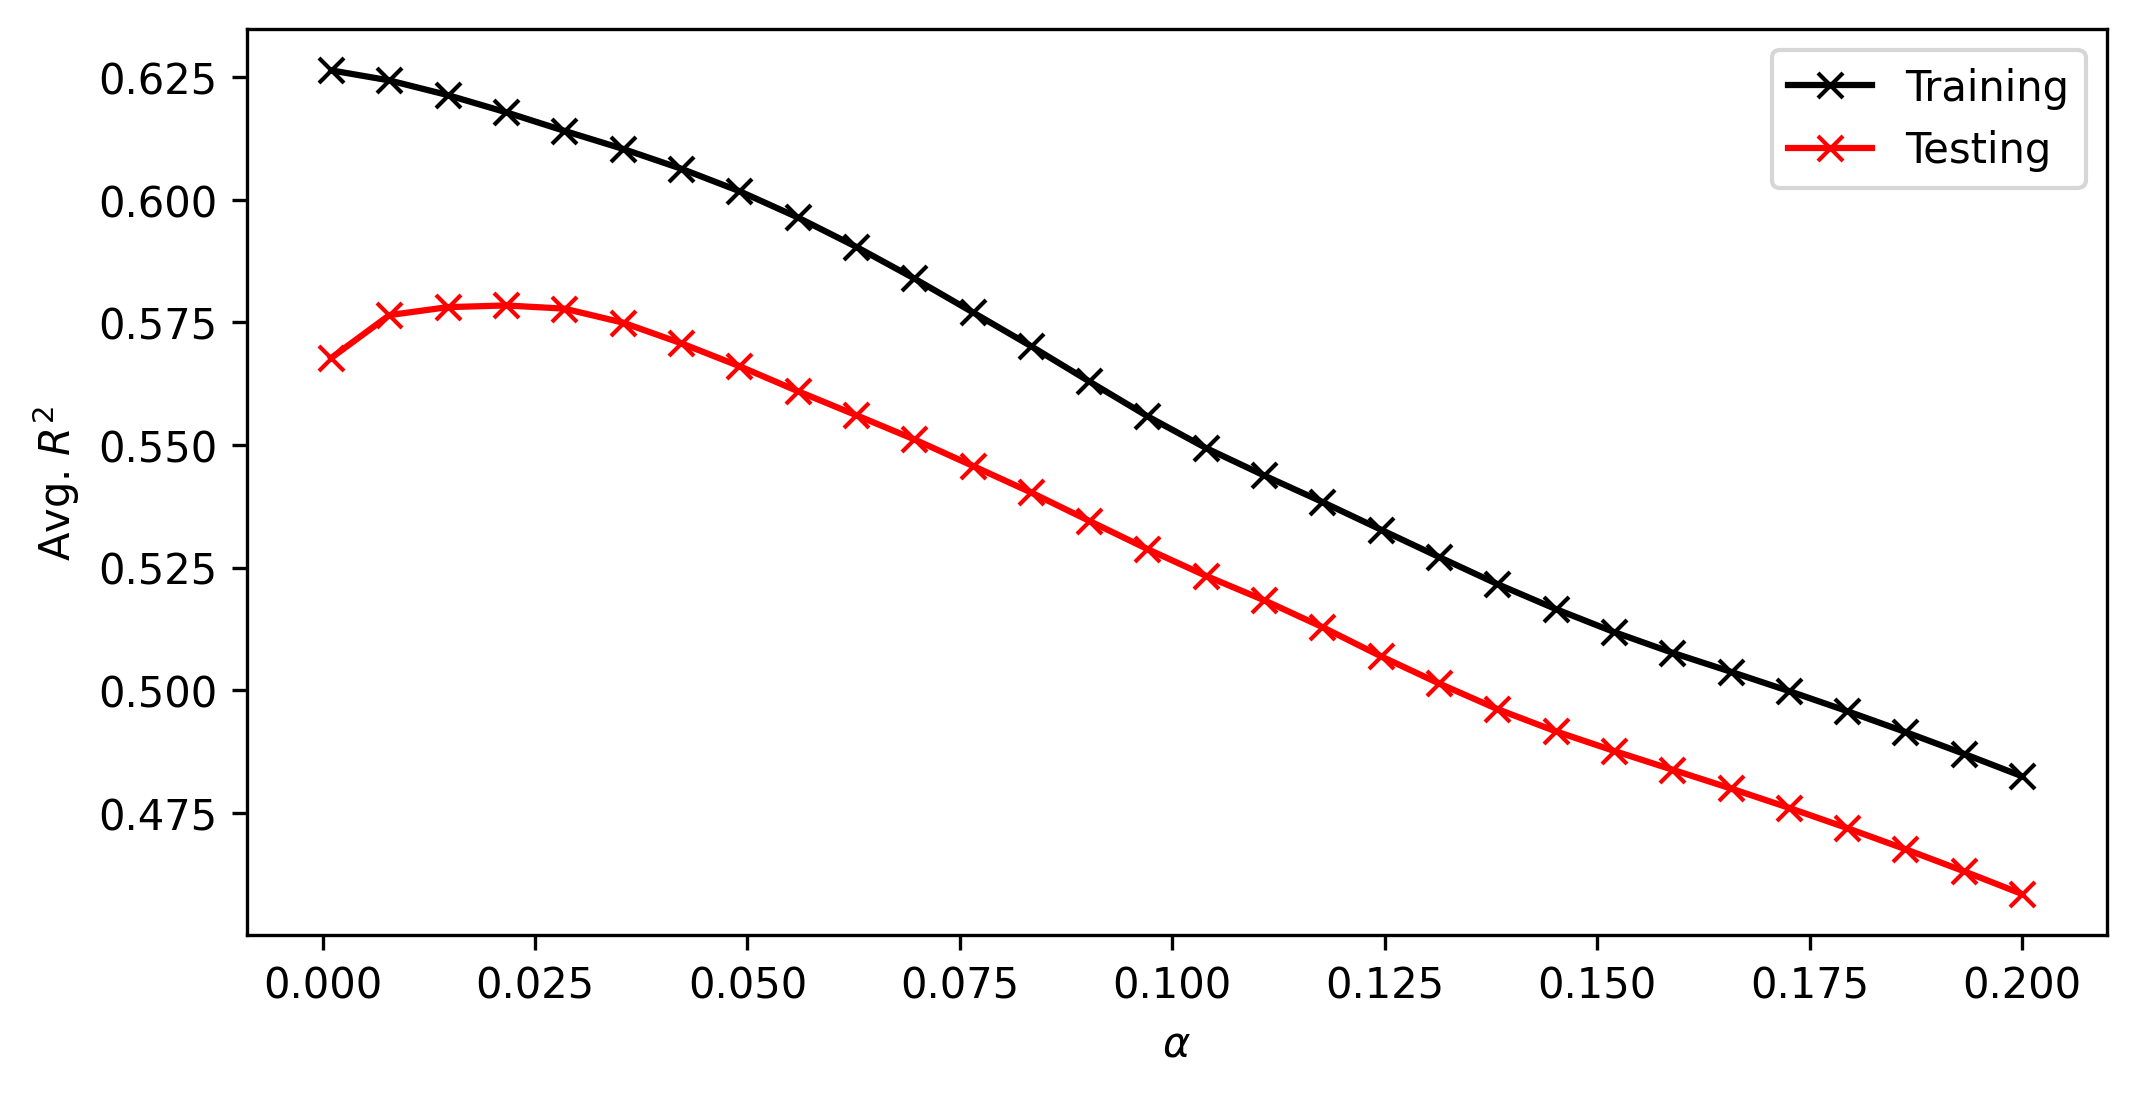

0.6178788792974792 0.5784782603826877 0.021586206896551725


In [ ]:
#Lasso, degree 2
alpha_range(Lasso,0.001,0.2,30,2,10)

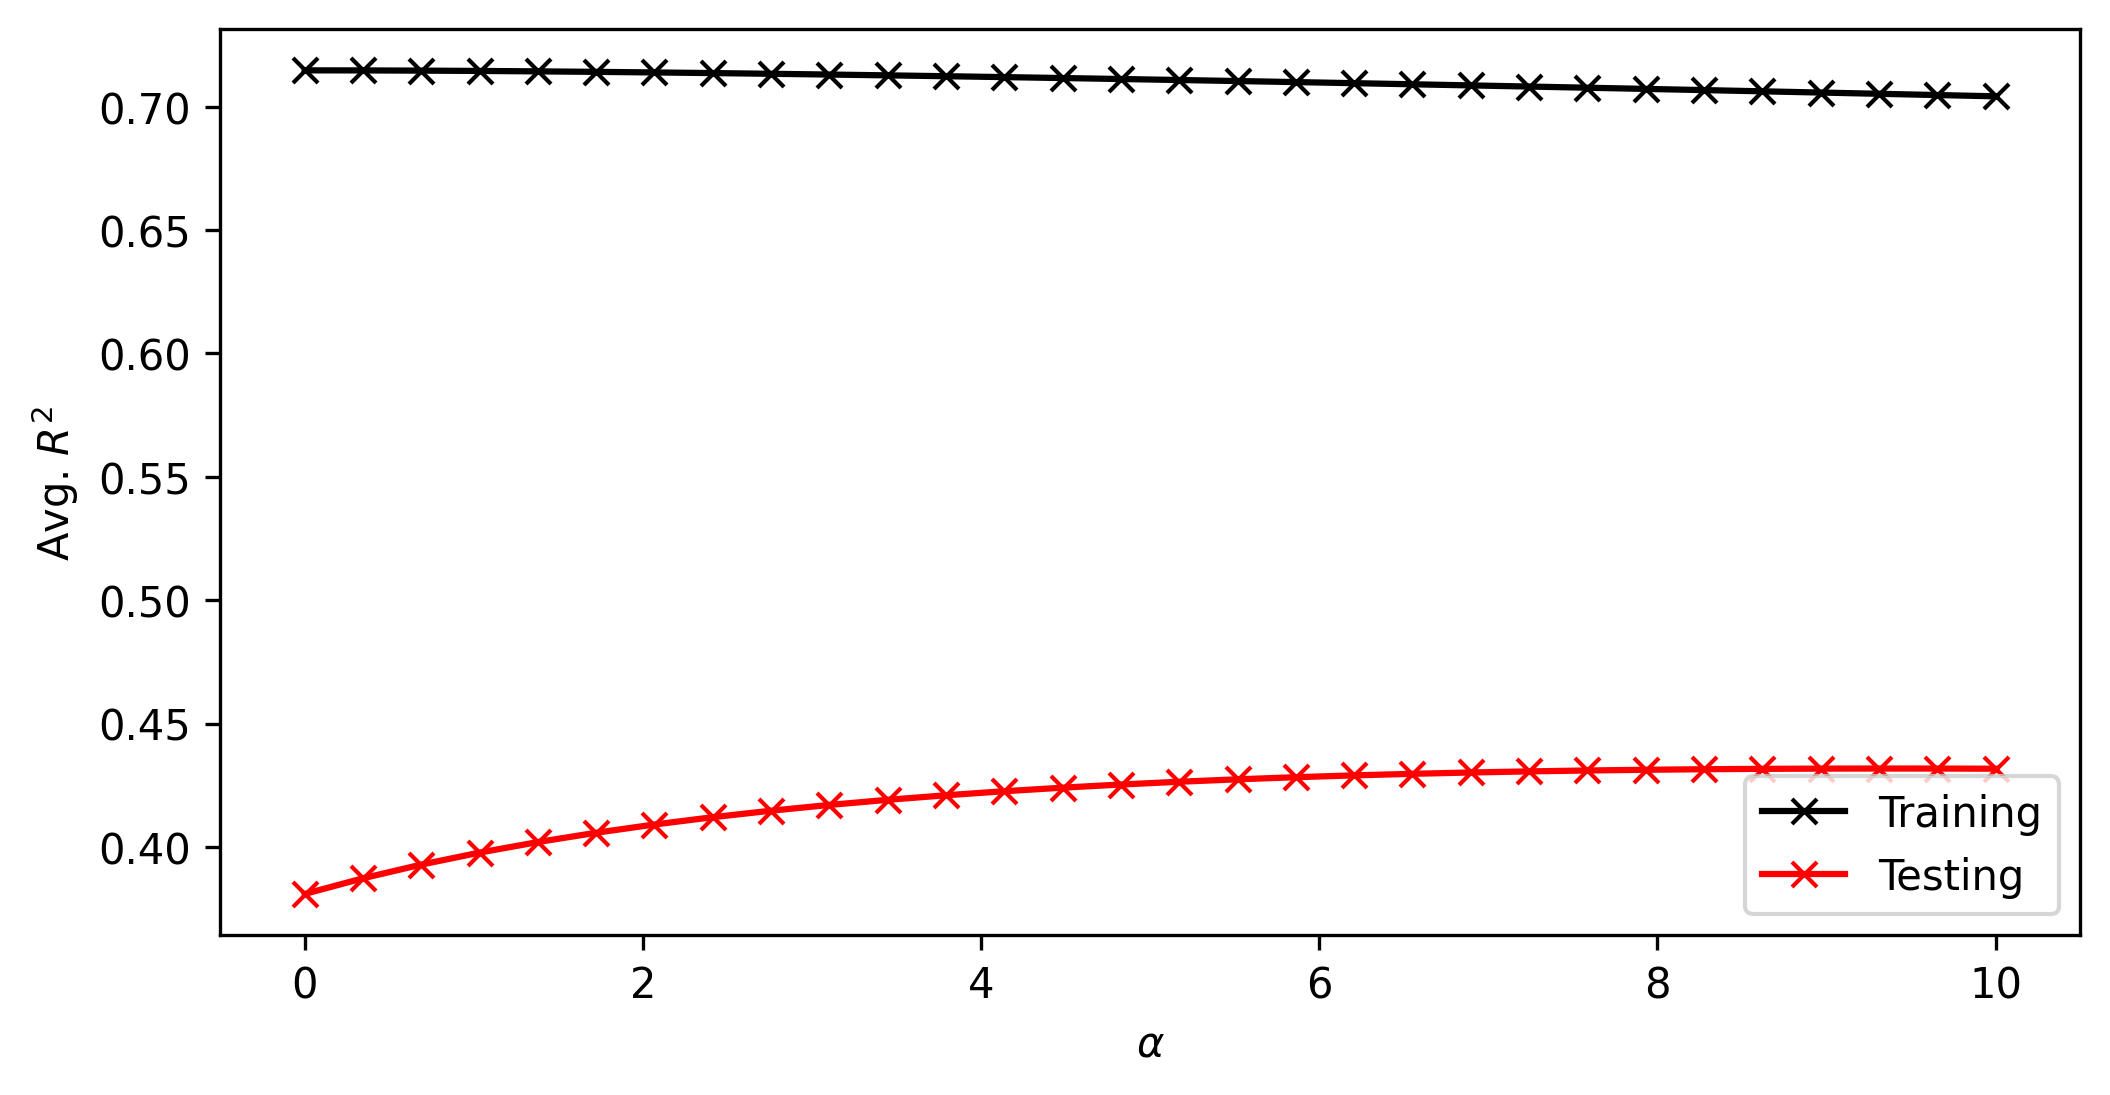

0.7052489485579334 0.43178984554856026 9.310344827586208


In [ ]:
#Lasso, degree 3
alpha_range(Lasso,0,10,30,3,10)

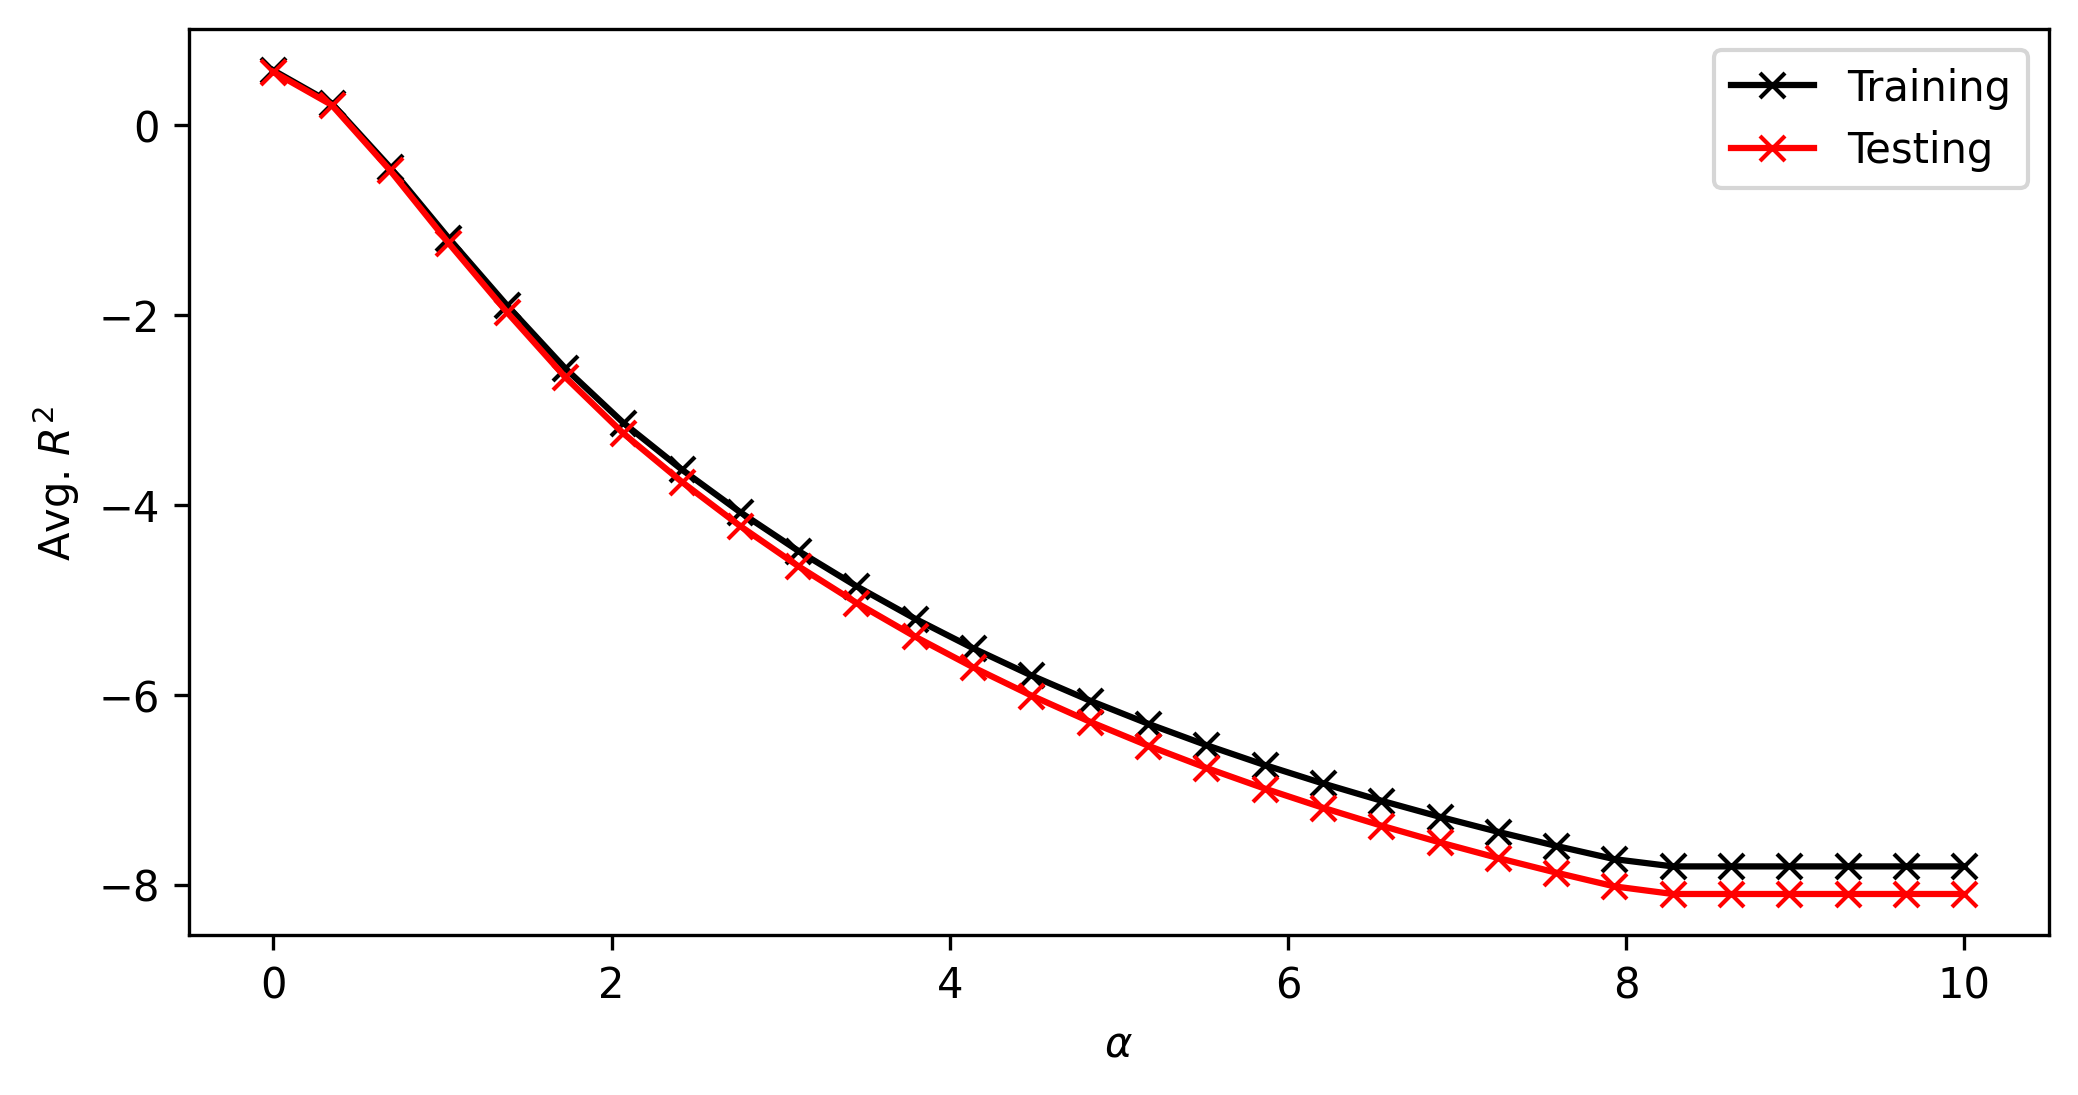

0.577577525157017 0.5608665863620875 1e-05


In [ ]:
#ElasticNet, degree 1
alpha_range(ElasticNet,0.00001,10,30,1,10)

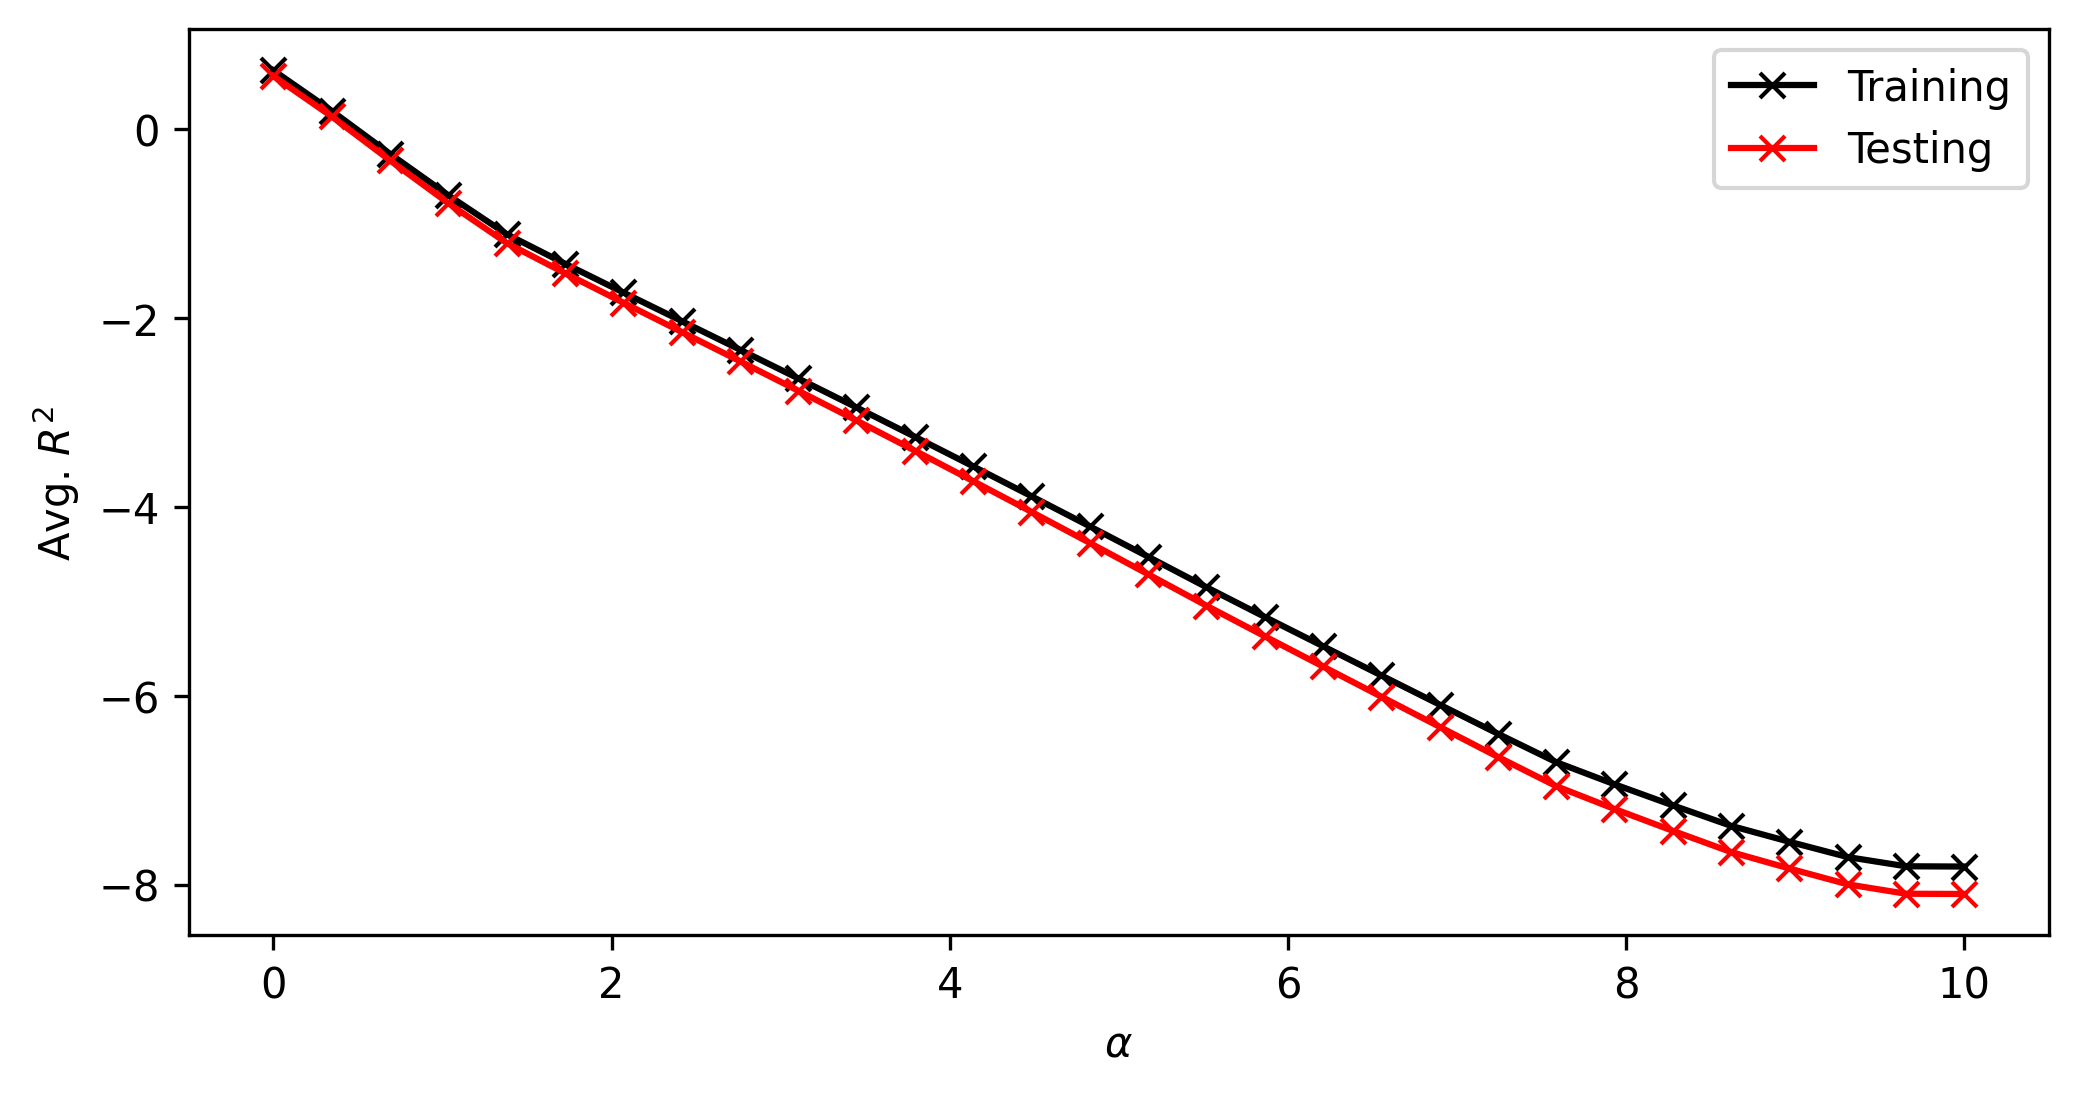

0.6264843247509639 0.5666911453938172 1e-05


In [ ]:
#ElasticNet, degree 2
alpha_range(ElasticNet,0.00001,10,30,2,10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.522e+02, tolerance: 1.516e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.364e+02, tolerance: 1.491e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

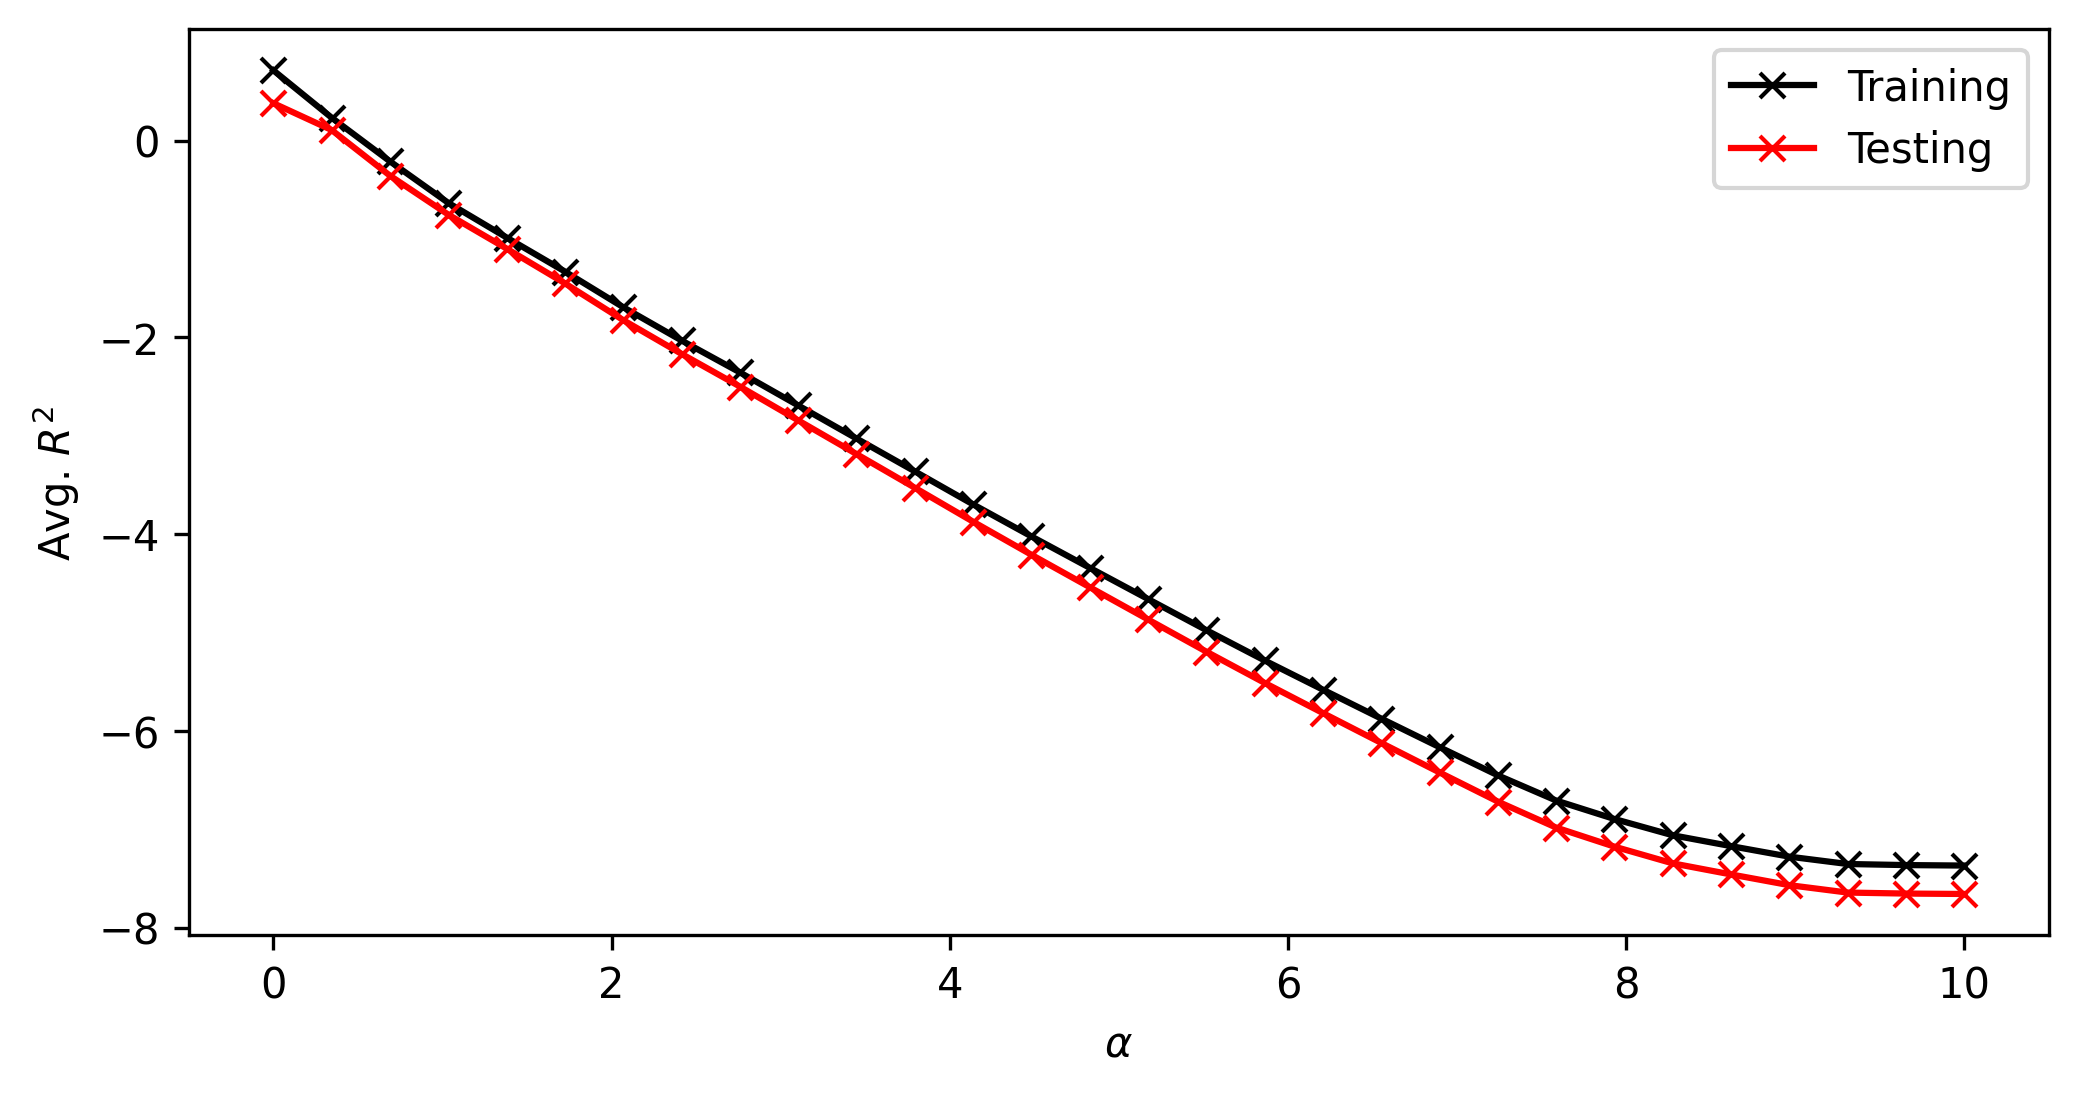

0.7147371571403709 0.380533795272337 1e-05


In [ ]:
#ElasticNet, degree 3
alpha_range(ElasticNet,0.00001,10,30,3,10)

####The best model is Lasso with degree 2.
####The best R^2 value is  0.58, alpha level is 0.02.

In [ ]:
model = Lasso(alpha=0.02,fit_intercept=False)
model.fit(X,y)
model.predict(X)
residuals = y - model_ridge1.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
import seaborn as sns

from scipy import stats
from scipy.stats import norm

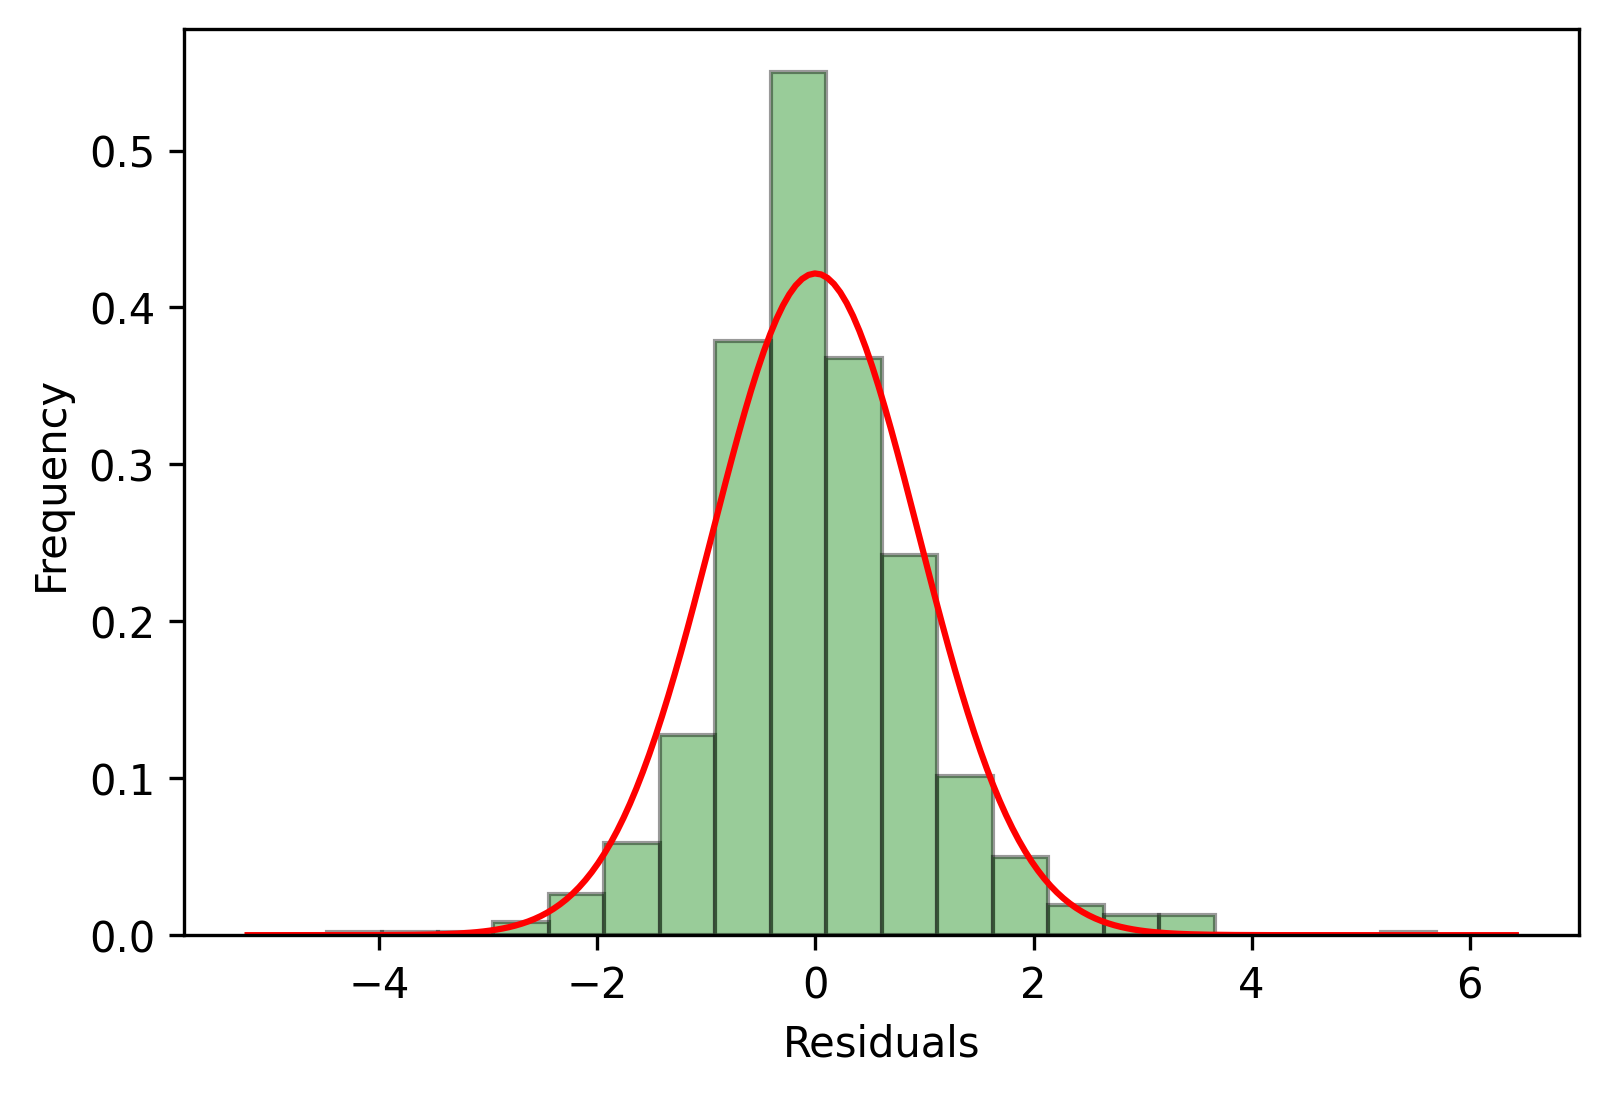

In [ ]:
ax1 = sns.distplot(residuals,
                                        
                  bins=20,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'green','ec':'black'},
                  fit=stats.norm,
                  fit_kws={"color":'red'})
ax1.set(xlabel='Residuals', ylabel='Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


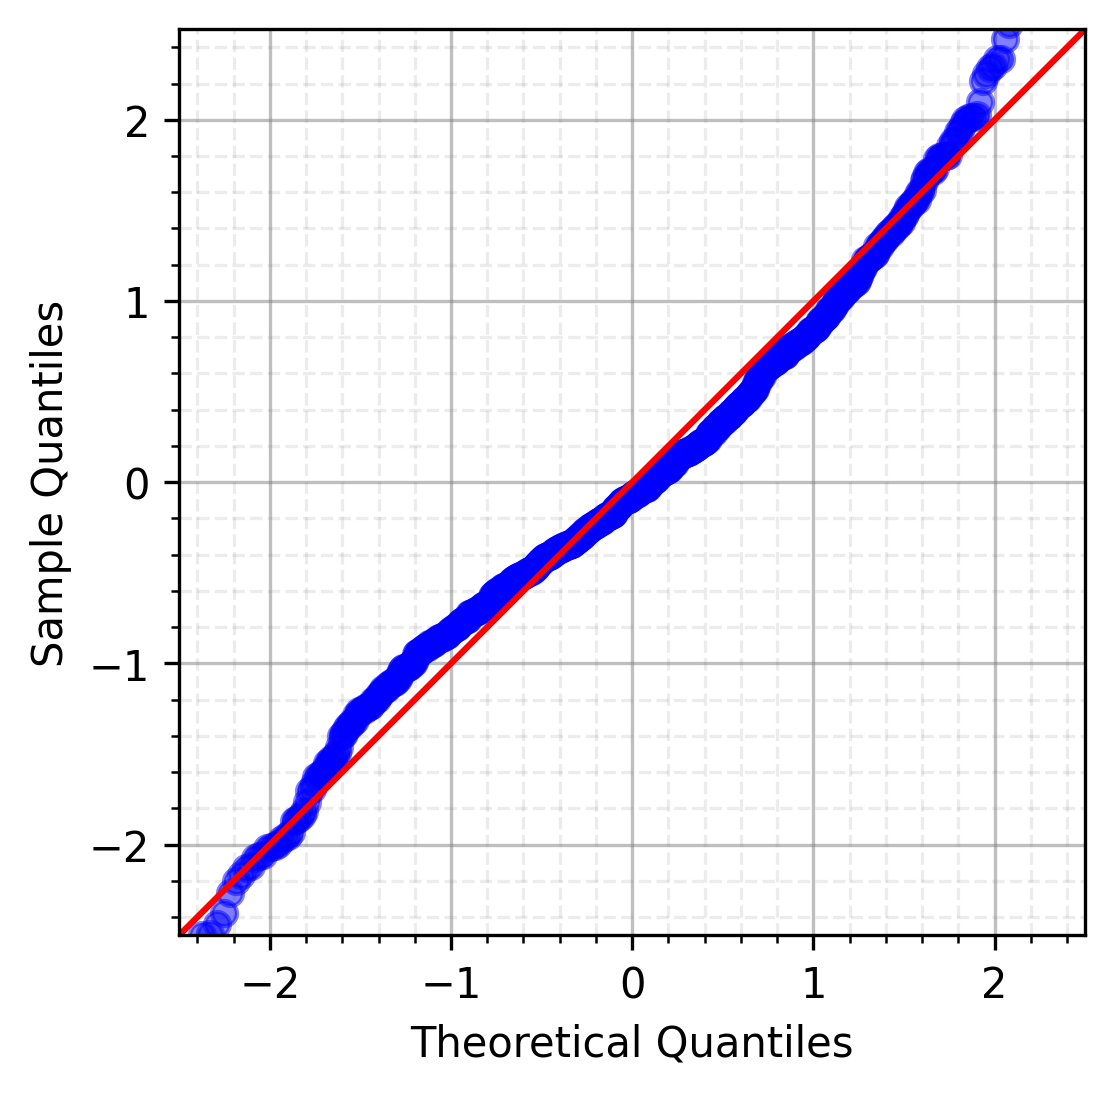

In [ ]:
import statsmodels.api as sm
sm.qqplot(residuals/np.std(residuals), loc = 0, scale = 1, line='s',alpha=0.5)
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.axes().set_aspect('equal')
plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

In [ ]:
dist = getattr(stats, 'norm')
params = dist.fit(residuals)

In [ ]:
array_residuals = np.array(residuals)

In [ ]:
ss = StandardScaler()
#residuals_s = ss.fit_transform(array_residuals)

In [ ]:
stats.kstest(residuals,'norm',params)
#small p value - reject the null hypothesis, this dataset does not follow a normal distribution 

KstestResult(statistic=0.06783874623813047, pvalue=0.000445612036732841)

In [ ]:
stats.anderson(residuals,'norm')


AndersonResult(statistic=7.507655251469373, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
stats.anderson(residuals,dist='norm') #the test stat is greater than critical values so we could reject the null hypothesis that
#this test is not normal? 

AndersonResult(statistic=7.460799299135147, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
#thus, this dataset does not follow a normal distribution 